# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train: (50000, 32, 32, 3) uint8
y_train: (50000, 1) uint8
x_test : (10000, 32, 32, 3) uint8
y_test : (10000, 1) uint8


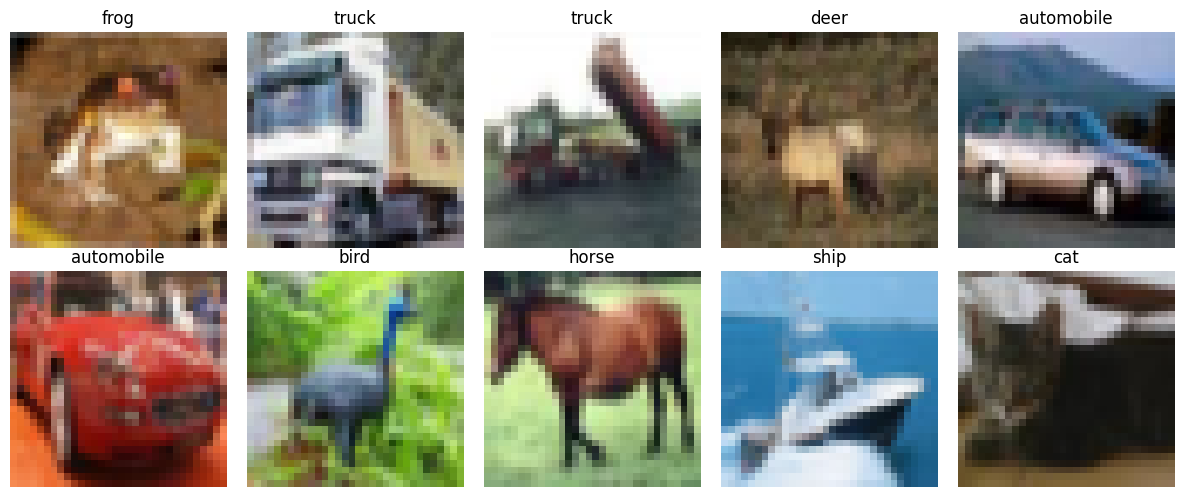

After preprocessing:
x_train: (50000, 32, 32, 3) float32 min/max: 0.0 1.0
y_train: (50000, 10) float64


In [16]:

print("x_train:", x_train.shape, x_train.dtype)
print("y_train:", y_train.shape, y_train.dtype)
print("x_test :", x_test.shape, x_test.dtype)
print("y_test :", y_test.shape, y_test.dtype)


class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# Show a few sample images
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i][0])])
    plt.axis("off")
plt.tight_layout()
plt.show()

# Normalize pixels to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# One-hot encode labels (needed for categorical_crossentropy)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

print("After preprocessing:")
print("x_train:", x_train.shape, x_train.dtype, "min/max:", x_train.min(), x_train.max())
print("y_train:", y_train.shape, y_train.dtype)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [17]:
from tensorflow.keras    import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

input_shape = (32, 32, 3)

model1 = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(100, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [19]:
from tensorflow.keras.optimizers import SGD

# Compile: define how the model learns
model1.compile(
    loss="categorical_crossentropy",
    optimizer=SGD(),
    metrics=["accuracy"]
)

# Train: learn from training data, validate on test data
history1 = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=512,
    verbose=1
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.1502 - loss: 2.2746 - val_accuracy: 0.2288 - val_loss: 2.1808
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2550 - loss: 2.1447 - val_accuracy: 0.2873 - val_loss: 2.0607
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2967 - loss: 2.0240 - val_accuracy: 0.3011 - val_loss: 1.9812
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3164 - loss: 1.9531 - val_accuracy: 0.3189 - val_loss: 1.9233
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3358 - loss: 1.9082 - val_accuracy: 0.3366 - val_loss: 1.8870
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3505 - loss: 1.8635 - val_accuracy: 0.3527 - val_loss: 1.8474
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3652 - loss: 1.8348 - val_accuracy: 0.3542 - val_loss: 1.8280
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3735 - loss: 1.8046 - val_accuracy: 0.3527 - v

*   Plot the cross entropy loss curve and the accuracy curve

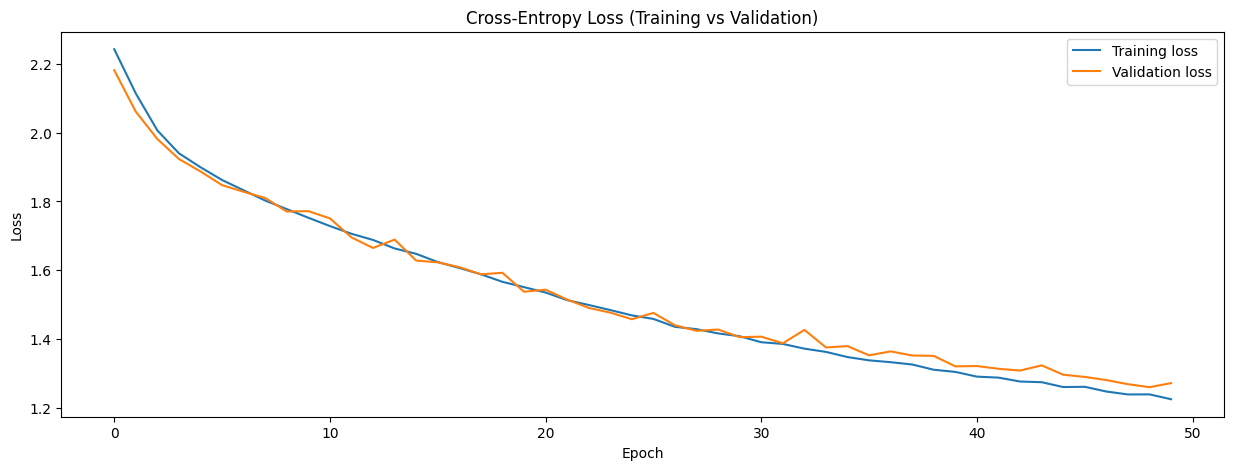

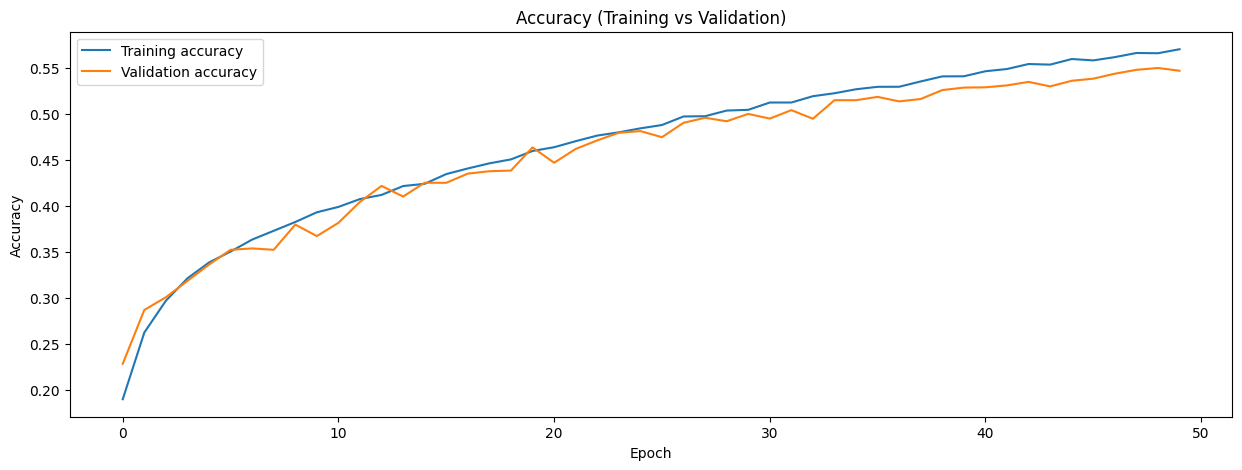

In [23]:
import matplotlib.pyplot as plt


# 1) Cross-entropy loss curves
plt.figure(figsize=(15, 5))
plt.plot(history1.history["loss"], label="Training loss")
plt.plot(history1.history["val_loss"], label="Validation loss")
plt.title("Cross-Entropy Loss (Training vs Validation)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 2) Accuracy curves
plt.figure(figsize=(15, 5))
plt.plot(history1.history["accuracy"], label="Training accuracy")
plt.plot(history1.history["val_accuracy"], label="Validation accuracy")
plt.title("Accuracy (Training vs Validation)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

input_shape = (32, 32, 3)

model2 = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=input_shape),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model2.compile(
    loss="categorical_crossentropy",
    optimizer=SGD(),
    metrics=["accuracy"]
)

history2 = model2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=512,
    verbose=1
)
model2.summary()



Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.1547 - loss: 2.2866 - val_accuracy: 0.2205 - val_loss: 2.2230
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2402 - loss: 2.1773 - val_accuracy: 0.2645 - val_loss: 2.0501
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2737 - loss: 2.0441 - val_accuracy: 0.2308 - val_loss: 2.1008
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3055 - loss: 1.9765 - val_accuracy: 0.3332 - val_loss: 1.9139
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.3364 - loss: 1.8908 - val_accuracy: 0.3507 - val_loss: 1.8582
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3612 - loss: 1.8408 - val_accuracy: 0.3590 - val_loss: 1.8105
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3820 - loss: 1.7912 - val_accuracy: 0.3708 - val_loss: 1.7920
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3815 - loss: 1.7714 - val_accuracy: 0.3869 - 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,140 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# This is already dont the in cell above
from tensorflow.keras.optimizers import SGD

model2.compile(
    loss="categorical_crossentropy",
    optimizer=SGD(),
    metrics=["accuracy"]
)

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


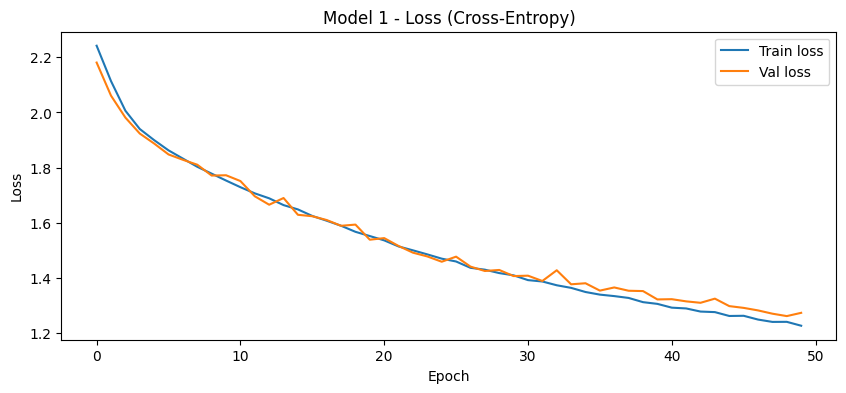

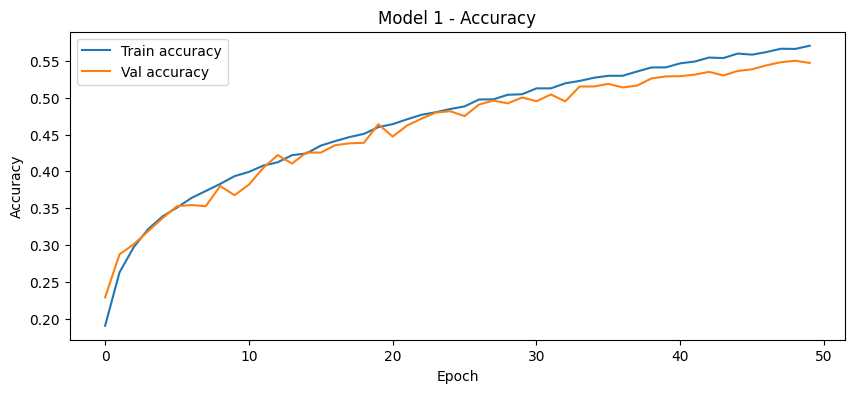

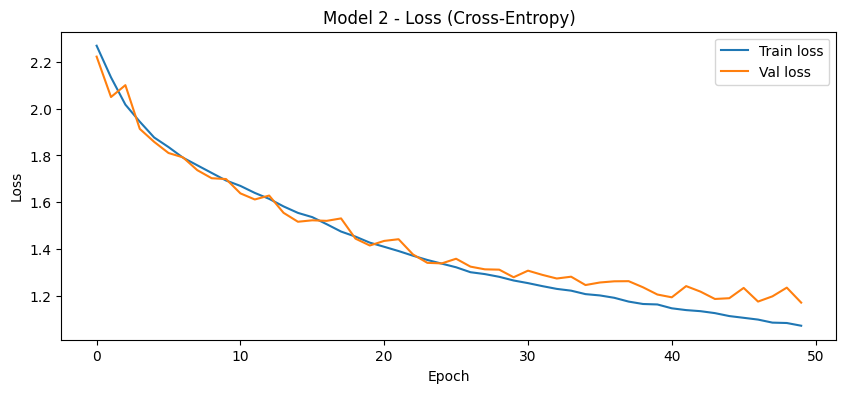

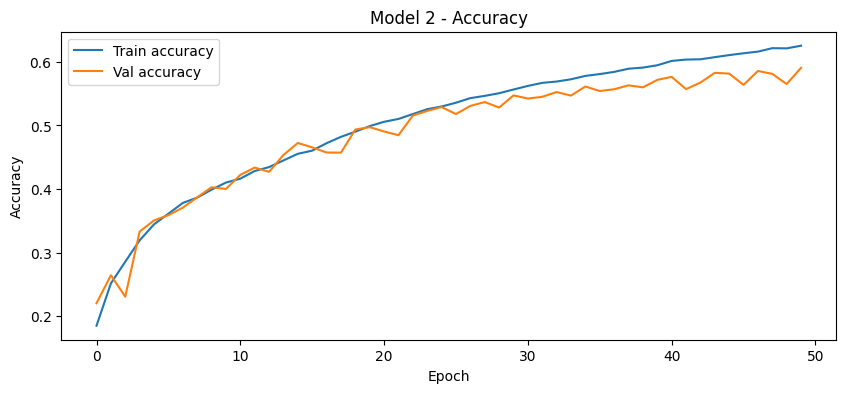

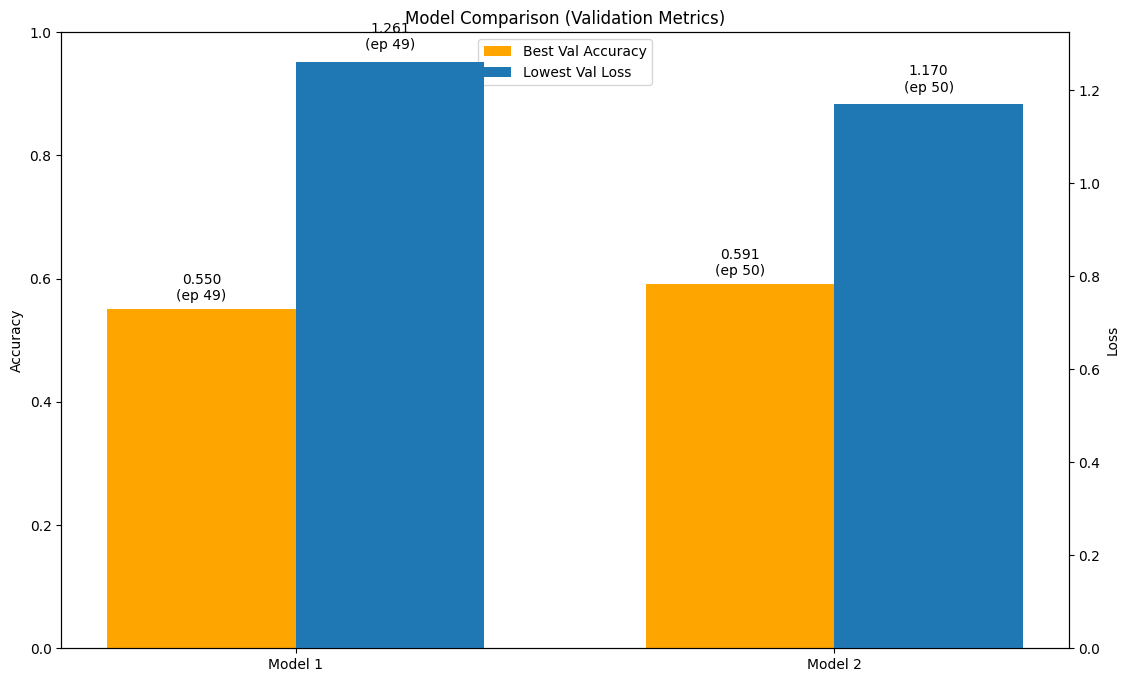

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Helpers ----------
def best_val_acc(history):
    return max(history.history["val_accuracy"])

def best_val_acc_epoch(history):
    return int(np.argmax(history.history["val_accuracy"])) + 1  # epochs are 1-indexed

def lowest_val_loss(history):
    return min(history.history["val_loss"])

def lowest_val_loss_epoch(history):
    return int(np.argmin(history.history["val_loss"])) + 1

# ---------- 1) Model 1: Loss ----------
plt.figure(figsize=(10, 4))
plt.plot(history1.history["loss"], label="Train loss")
plt.plot(history1.history["val_loss"], label="Val loss")
plt.title("Model 1 - Loss (Cross-Entropy)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ---------- 2) Model 1: Accuracy ----------
plt.figure(figsize=(10, 4))
plt.plot(history1.history["accuracy"], label="Train accuracy")
plt.plot(history1.history["val_accuracy"], label="Val accuracy")
plt.title("Model 1 - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ---------- 3) Model 2: Loss ----------
plt.figure(figsize=(10, 4))
plt.plot(history2.history["loss"], label="Train loss")
plt.plot(history2.history["val_loss"], label="Val loss")
plt.title("Model 2 - Loss (Cross-Entropy)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ---------- 4) Model 2: Accuracy ----------
plt.figure(figsize=(10, 4))
plt.plot(history2.history["accuracy"], label="Train accuracy")
plt.plot(history2.history["val_accuracy"], label="Val accuracy")
plt.title("Model 2 - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ---------- Summary Bar Chart ----------
m1_best_acc = best_val_acc(history1)
m2_best_acc = best_val_acc(history2)

m1_low_vloss = lowest_val_loss(history1)
m2_low_vloss = lowest_val_loss(history2)

m1_best_acc_ep = best_val_acc_epoch(history1)
m2_best_acc_ep = best_val_acc_epoch(history2)

m1_low_vloss_ep = lowest_val_loss_epoch(history1)
m2_low_vloss_ep = lowest_val_loss_epoch(history2)

labels = ["Model 1", "Model 2"]
x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(13, 8))

# Left axis: Best Val Accuracy
bars1 = ax1.bar(x - width/2, [m1_best_acc, m2_best_acc], width, label="Best Val Accuracy", color="orange")
ax1.set_ylabel("Accuracy")
ax1.set_ylim(0, 1.0)


# Right axis: Lowest Val Loss
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, [m1_low_vloss, m2_low_vloss], width, label="Lowest Val Loss")
ax2.set_ylabel("Loss")

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
plt.title("Model Comparison (Validation Metrics)")

# Combine legends from both axes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper center")

# Add simple annotations (values + epoch)
for i, (acc_val, acc_ep) in enumerate([(m1_best_acc, m1_best_acc_ep), (m2_best_acc, m2_best_acc_ep)]):
    ax1.text(i - width/2, acc_val + 0.01, f"{acc_val:.3f}\n(ep {acc_ep})", ha="center", va="bottom")

for i, (vl_val, vl_ep) in enumerate([(m1_low_vloss, m1_low_vloss_ep), (m2_low_vloss, m2_low_vloss_ep)]):
    ax2.text(i + width/2, vl_val + 0.02, f"{vl_val:.3f}\n(ep {vl_ep})", ha="center", va="bottom")

plt.show()

# aded addtional barchart for clarity.

#

**Comment on the observation**

To appears they both have a gap from loss and accuacy, Model one has a bigger gap between the loss and acuracy showing more over fitting, its also slightly worse than model 2 in accuracy with 0.591 and val loss being a little lower. Indicated less over fitting than model 1.

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


Model 2 - Test loss: 1.1702
Model 2 - Test accuracy: 0.5907
Predictions shape: (10000, 10)
Pred class ids shape: (10000,)
True class ids shape: (10000,)


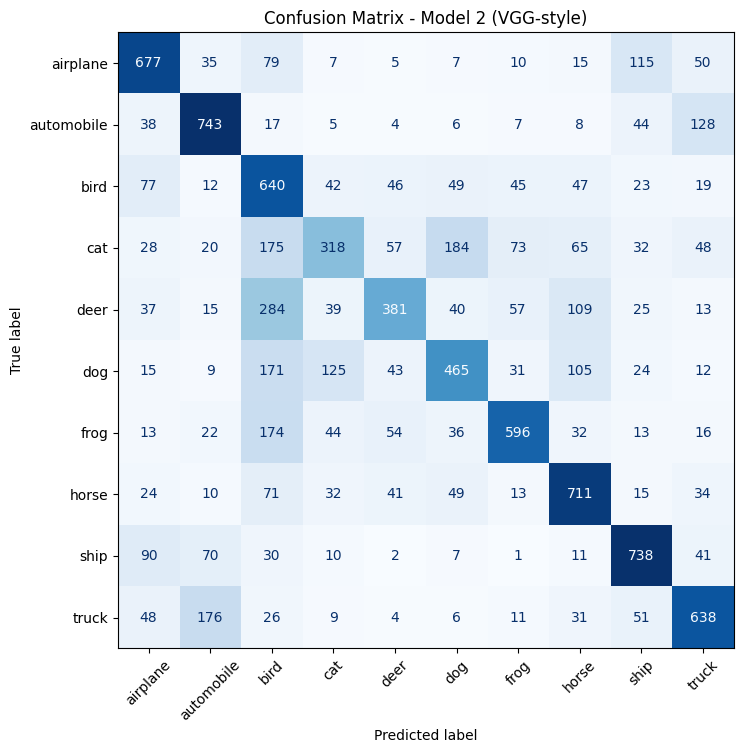

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Evaluate model2 on the test set
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
print(f"Model 2 - Test loss: {test_loss2:.4f}")
print(f"Model 2 - Test accuracy: {test_acc2:.4f}")

# 2) Predict probabilities for test images
y_pred_prob2 = model2.predict(x_test, verbose=0)

# 3) Convert probabilities -> predicted class ids
y_pred2 = np.argmax(y_pred_prob2, axis=1)

# 4) Convert one-hot true labels -> true class ids
y_true = np.argmax(y_test, axis=1)

print("Predictions shape:", y_pred_prob2.shape)
print("Pred class ids shape:", y_pred2.shape)
print("True class ids shape:", y_true.shape)


# Confusion matrix
cm2 = confusion_matrix(y_true, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, xticks_rotation=45, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix - Model 2 (VGG-style)")
plt.show()


**Comment here :**

It looks like model 2 is struggling with visiaully similar classes, The highest number of errors accords with Deer vs Bird (284), Cat vs Dog (184) and Automobile vs Truck (176).

Even though the accuracy improved it shows that visually similar clases remain a challenge for this model. Meaning a even deeper number of conv blocks maybe some extra augmentation would be neeeded here to reduce the confusion and improve results.

...

*    Print the test accuracy for the trained model.

In [46]:
test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=0)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)

print(f"Model 1 Test Accuracy: {test_acc1:.4f}")
print(f"Model 2 Test Accuracy: {test_acc2:.4f}")


Model 1 Test Accuracy: 0.5473
Model 2 Test Accuracy: 0.5907


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [47]:
from keras.backend import clear_session
clear_session()

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Resize inputs from 32x32 to 64x64 (required by the lab)
x_train_64 = tf.image.resize(x_train, (64, 64)).numpy()
x_test_64  = tf.image.resize(x_test, (64, 64)).numpy()

input_shape = (64, 64, 3)

model3 = Sequential([
    # Block 1: 64 filters
    Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=input_shape),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2: 128 filters
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 3: 256 filters
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model3.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 116s 843ms/step - accuracy: 0.1080 - loss: 2.3016 - val_accuracy: 0.1459 - val_loss: 2.2975
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 387ms/step - accuracy: 0.1670 - loss: 2.2957 - val_accuracy: 0.2018 - val_loss: 2.2852
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 388ms/step - accuracy: 0.1944 - loss: 2.2760 - val_accuracy: 0.2288 - val_loss: 2.2079
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 390ms/step - accuracy: 0.2313 - loss: 2.1684 - val_accuracy: 0.2725 - val_loss: 2.0443
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 391ms/step - accuracy: 0.2531 - loss: 2.0784 - val_accuracy: 0.3210 - val_loss: 1.9408
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 391ms/step - accuracy: 0.3001 - loss: 1.9828 - val_accuracy: 0.3434 - val_loss: 1.8698
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 390ms/step - accuracy: 0.3241 - loss: 1.9202 - val_accuracy: 0.3315 - val_loss: 1.8630
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 392ms/step - accuracy: 0.3419 - loss: 1.8469 - val_acc

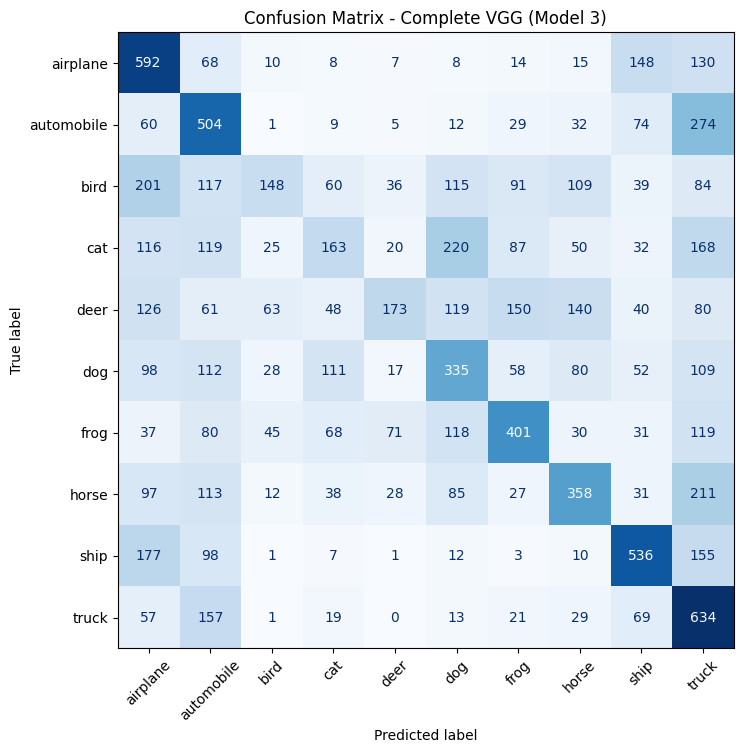

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compile (required settings)
model3.compile(
    loss="categorical_crossentropy",
    optimizer=SGD(),
    metrics=["accuracy"]
)

# Train for 10 epochs (required)
history3 = model3.fit(
    x_train_64, y_train,
    validation_data=(x_test_64, y_test),
    epochs=10,
    batch_size=512,
    verbose=1
)

# Predict + confusion matrix
y_pred_prob3 = model3.predict(x_test_64, verbose=0)
y_pred3 = np.argmax(y_pred_prob3, axis=1)
y_true = np.argmax(y_test, axis=1)

cm3 = confusion_matrix(y_true, y_pred3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, xticks_rotation=45, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix - Complete VGG (Model 3)")
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

- They introduce non-linearity into the network, if we didnt use them, multiple layers would callapse into a single linear type model. and the model would only be able to make linear decisions.
- We can use Relu for the invisible layers which  helps keep training effecient and controls gradient flow, and the other is softmax.  This is used on the output layer, it converts the logits (positive and negative digits) into class probabilities.

2 - Key Differences between sigmoid and softmax:
- Sigmoid uses binary classificationn and keeps each output independant.
- Softmax outputs are paired so that probababilities sum up to 1.
- It is usually used for multiclass single label classification. (makes sure there is exsacly 1 correct class)

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
- Binary crossentropy is for binary targets (y) or multilabel clasification.
- Treats all binary outputs as a independant decision.
- compares the predictability probability distribution over classes to the true class.
